##### 1 – Imports

In [1]:
from sqw.tesselations import even_cycle_two_tesselation
from sqw.experiments import running
from sqw.states import uniform_initial_state, amp2prob
from sqw.statistics import states2mean, states2std, states2ipr, states2survival
from sqw.plots import final_distribution_plot, mean_plot, std_plot, ipr_plot, survival_plot
from sqw.utils import random_tesselation_order, random_angle_deviation, tesselation_choice

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

##### 2 – Dynamics

###### 2.1 – Original

In [2]:
N = 121
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 20
angles = [[np.pi/3, np.pi/3]] * steps
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2+1])

states_ua_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

final_dist = [amp2prob(x) for x in states_ua_ut]

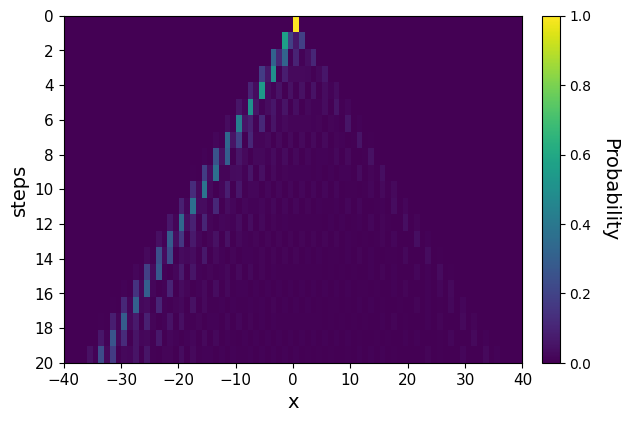

In [3]:
x = np.arange(-N//2, N//2, 1)
y = np.arange(0, steps, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

im = ax.imshow(final_dist,interpolation='None',cmap='viridis', extent = [-N//2, N//2, steps, 0])

ratio = 0.5
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
ax.set_xlabel('x',fontsize = 14)
ax.set_ylabel('steps',fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=11)

ax.set_xlim([-40,40])

ax.set_yticks(np.arange(0, steps+1, 2))
ax.set_xticks(np.arange(-40, 41, 10))

cbar = fig.colorbar(im,fraction=0.035, pad=0.04)
cbar.set_label('Probability', rotation=270,labelpad=20,fontsize = 14)


# plt.savefig(f'images/sqw_N{N}_t{steps}_thetapi3-pi3_init0.png',bbox_inches='tight',dpi=300)
plt.show()

In [26]:
states2std(states_ra_ut, range(0, N))

[array([0.]),
 array([1.01588354]),
 array([2.14229941]),
 array([3.06864547]),
 array([3.69981056]),
 array([4.41997251]),
 array([5.1899234]),
 array([6.17615237]),
 array([6.93260036]),
 array([7.67949429]),
 array([8.38087124]),
 array([8.70967194]),
 array([9.39464224]),
 array([9.74673278]),
 array([9.9006329]),
 array([10.2600225]),
 array([10.8578021]),
 array([11.64936745]),
 array([12.09601626]),
 array([12.84208164]),
 array([13.72803116])]

###### 2.2 – Random Angles

In [24]:
N = 121
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 20
angles = random_angle_deviation([np.pi/3, np.pi/3], [.4, .4], steps)
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2 + 1])

states_ra_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

final_dist = [amp2prob(x) for x in states_ra_ut]

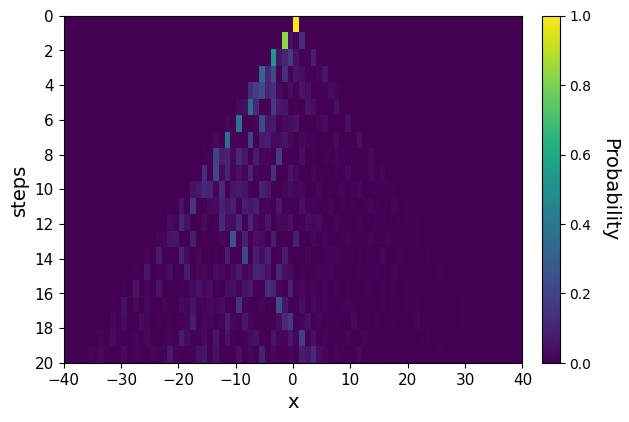

In [25]:
x = np.arange(-N//2, N//2, 1)
y = np.arange(0, steps, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()

im = ax.imshow(final_dist,interpolation='None',cmap='viridis', extent = [-N//2, N//2, steps, 0])

ratio = 0.5
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
ax.set_xlabel('x',fontsize = 14)
ax.set_ylabel('steps',fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=11)

ax.set_xlim([-40,40])

ax.set_yticks(np.arange(0, steps+1, 2))
ax.set_xticks(np.arange(-40, 41, 10))

cbar = fig.colorbar(im,fraction=0.035, pad=0.04)
cbar.set_label('Probability', rotation=270,labelpad=20,fontsize = 14)


# plt.savefig(f'images/sqw_N{N}_t{steps}_thetapi3-pi3_init0.png',bbox_inches='tight',dpi=300)
plt.show()